#### **Gradient Descent #3**

In [1]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

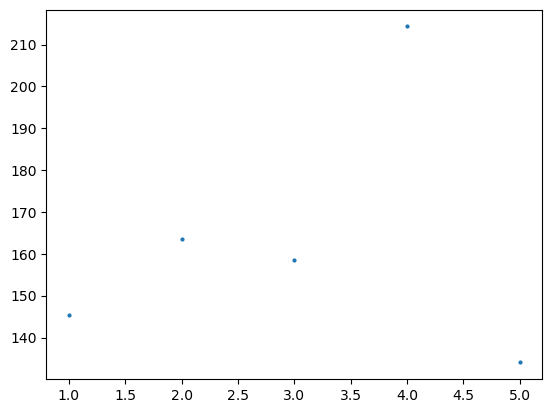

In [2]:
# Let us create some random data
data_size=5

mu, sigma = 144, 24.29 # mean and standard deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(1 ,  data_size + 1)
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

In [3]:
%matplotlib notebook 
plt.rcParams['animation.html'] = 'jshtml'

In [4]:
fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
b_current = 100
m_current = 20

learningRate = 0.00001
num_iteration = 200 

precision = 0.1


previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    
    if(i % 1 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 5.0
Iteration No.= 0  m =  19.999750928499232  b= 100.00003159522691  Cost= 1346.8998034559072
Stoped at iteration 1
m =  19.999501883448474  b= 100.00006319761002


In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [7]:
train = pd.read_csv('training_data_ex.csv')
test = pd.read_csv('test_data_ex.csv')

#### **#12:**

In [17]:
# model already split into train and test, split by features
x_train = train[['f1', 'f2']]
y_train = train[['label']].values.ravel()
x_test = test[['f1', 'f2']]
y_test = test[['label']]



# create model and fit it
model = LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)


# use model to predict and print result
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       980
           1       0.00      0.00      0.00      1020

    accuracy                           0.49      2000
   macro avg       0.24      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

#### **##13:**

In [18]:

from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

model = svm.SVC()
model.fit(scaled_x_train, y_train)

y_pred = model.predict(scaled_x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



#### **#14**

This model is perfect and cannot be improved

OR

Use a different kernel at first, and to improve, use default kernel to get 100%

#### **Q17**

DBSCAN and KMEANS

they just put dbscan

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

# Initialize a k-means model with k=2
kmModel = KMeans(n_clusters=2)

# Fit the model
kmModel = kmModel.fit(train)

# Save the cluster centroids
centroids = kmModel.cluster_centers_
centroids[1]

/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 2.13121237e-01,  5.63877057e-01, -1.60982339e-15])

In [11]:
# Save the cluster assignments
clusters = kmModel.fit_predict(train[['f1', 'f2', 'label']])

# View the clusters for the first five instances
clusters[0:5]

/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 0], dtype=int32)

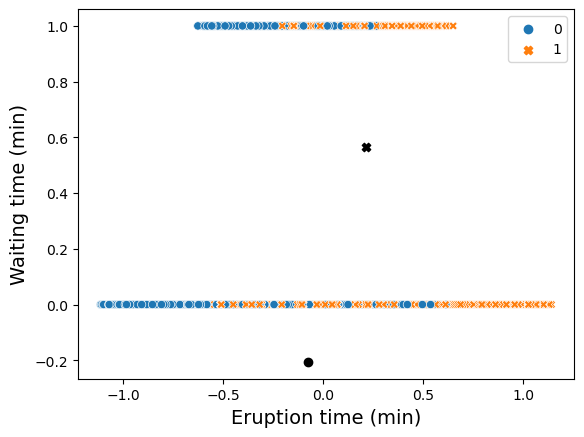

In [12]:
# Plot clusters
p = sns.scatterplot(
    data=train, x='f1', y='label', hue=clusters, style=clusters
)
p.set_xlabel('Eruption time (min)', fontsize=14)
p.set_ylabel('Waiting time (min)', fontsize=14)

# Add centroid for cluster 0
plt.scatter(x=centroids[0, 0], y=centroids[0, 1], c='black')

# Add centroid for cluster 1
plt.scatter(x=centroids[1, 0], y=centroids[1, 1], c='black', marker='X')


In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = train[['f1', 'f2']]
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score = silhouette_score(X, labels)
print(silhouette_score)


/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.35333431987820385


/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.35333431987820385


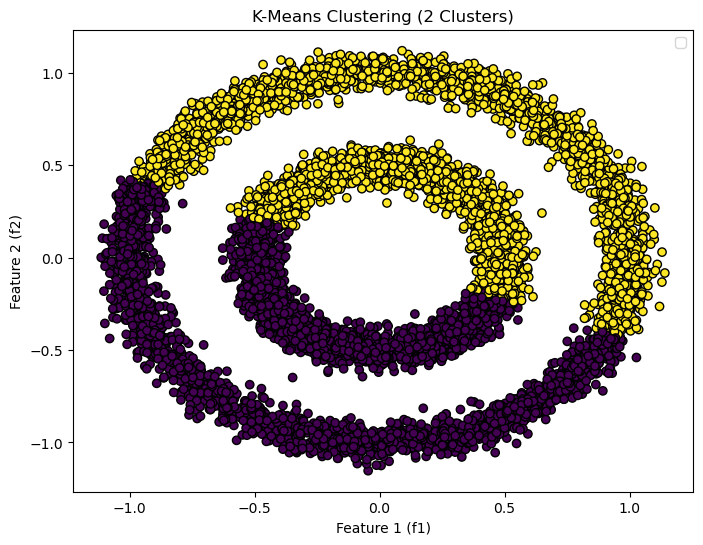

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming 'train' is your DataFrame containing features 'f1' and 'f2'
X = train[['f1', 'f2']]

# Perform K-Means clustering with 2 clusters and a fixed random state
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.labels_

# Calculate silhouette score
silhouette_score = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_score)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(X['f1'], X['f2'], c=labels, cmap='viridis', edgecolors='k')  # Color by cluster label
plt.title('K-Means Clustering (2 Clusters)')
plt.xlabel('Feature 1 (f1)')
plt.ylabel('Feature 2 (f2)')

# Add a legend (optional)
plt.legend()

plt.show()


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ... (data preparation as before)

clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering.fit(X)
labels = clustering.labels_
silhouette_score_hierarchical = silhouette_score(X, labels)
print("Silhouette Score (Hierarchical):", silhouette_score_hierarchical)


Silhouette Score (Hierarchical): 0.3409711769659077


In [16]:
from sklearn.cluster import DBSCAN

# ... (data preparation as before)

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Use min_samples instead of MinPts
dbscan.fit(X)
labels = dbscan.labels_
silhouette_score_dbscan = silhouette_score(X, labels)
print("Silhouette Score (DBSCAN):", silhouette_score_dbscan)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)